# Augmentation

In [1]:
import sys
sys.path.append('../')

%load_ext autoreload
%autoreload 2

from text_data import datasets, target_transforms, transforms, augmentations
from textboxespp.models.textboxespp import TextBoxesPP

from textboxespp.core.inference import toVisualizeQuadsRGBimg, toVisualizeRectangleRGBimg, tensor2cvrgbimg

import torch
%matplotlib notebook
import matplotlib.pyplot as plt

loading annotations into memory...
0:00:01.012083
creating index...
index created!
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


<IPython.core.display.Javascript object>


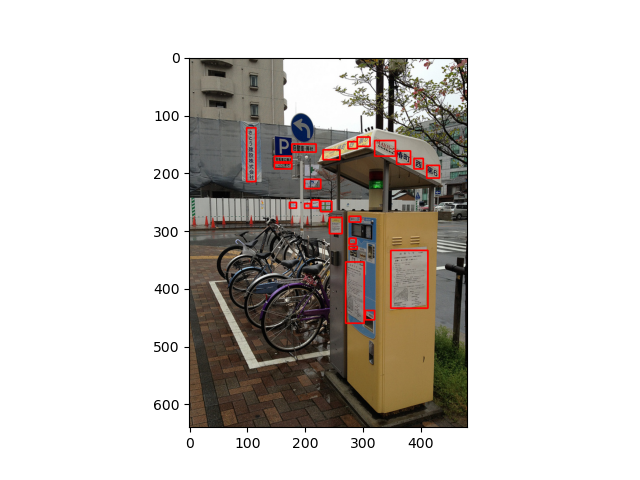

['', '', '', '']


<IPython.core.display.Javascript object>


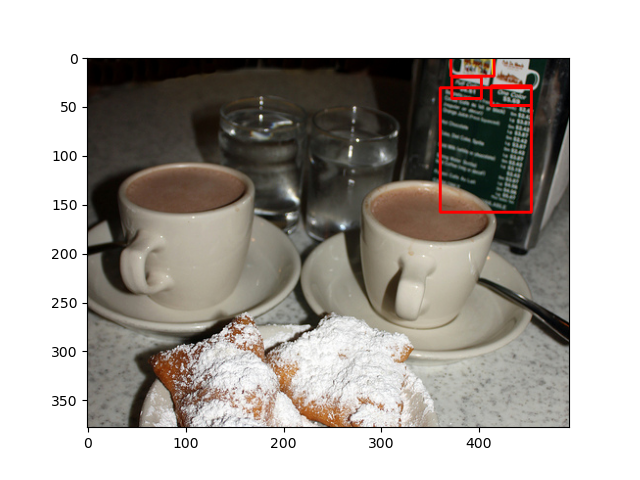

['', '', '', '', '6', '410', '', '', '']


<IPython.core.display.Javascript object>


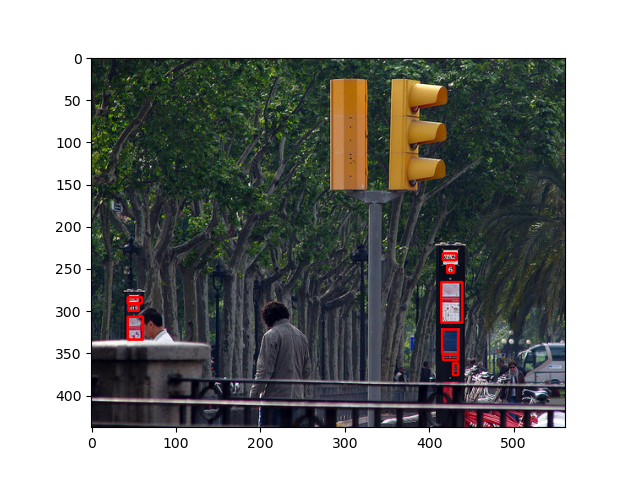

['ELIZABETH', 'WORKSHOP', 'knitting', 'ELIZABETH']


<IPython.core.display.Javascript object>


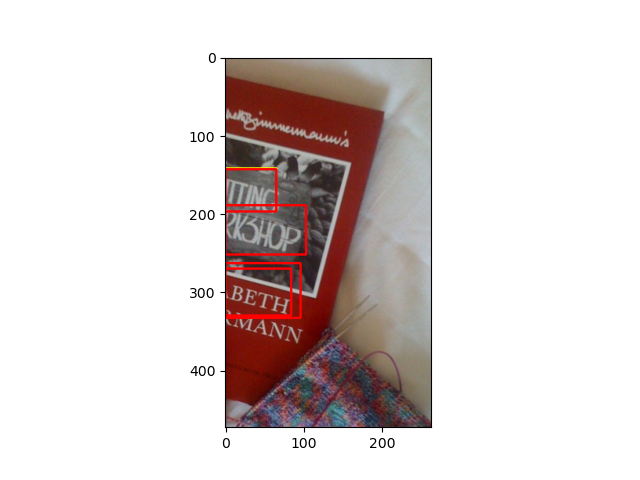

In [2]:
augmentation = augmentations.RandomSampled()

transform = transforms.Compose(
    [transforms.ToTensor(),
     #transforms.Normalize(rgb_means=(0.485, 0.456, 0.406), rgb_stds=(0.229, 0.224, 0.225))]
    ]
)
target_transform = target_transforms.Compose(
    [target_transforms.Corners2Centroids(),
     target_transforms.ToTensor()]
)
dataset = datasets.COCO2014Text_Dataset(ignore=None, transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets, texts = dataset[index]
    
    locs, quads = targets[:, :4], targets[:, 4:12]

    print(texts)

    img = toVisualizeRectangleRGBimg(img, locs, rgb=(255,255,0), verbose=False)# yellow
    img = toVisualizeQuadsRGBimg(torch.from_numpy(img.transpose((2, 0, 1)) / 255.), quads, verbose=False)# red

    plt.figure()
    plt.imshow(img)

['RE:', '80486DX-50', 'Message-ID:', 'Date:', 'Tue,', '06', 'Apr', 'Tilburg', 'Date:', 'Lines:', '38', 'then', 'voltage', 'AGC', 'is', 'a', 'UUCP:', 'it.']


<IPython.core.display.Javascript object>


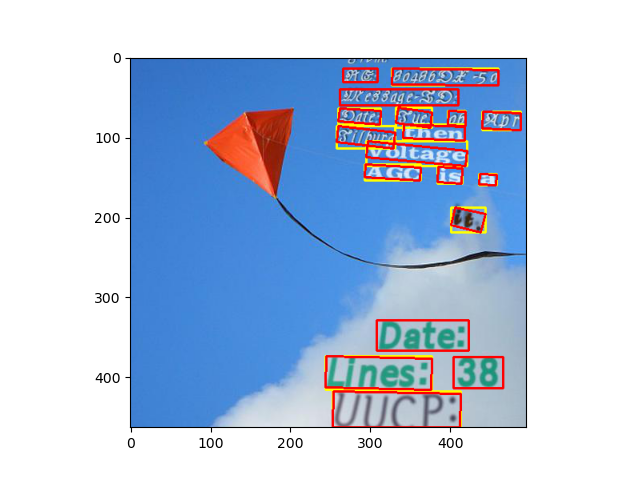

['board,', 'disk', '6']


<IPython.core.display.Javascript object>


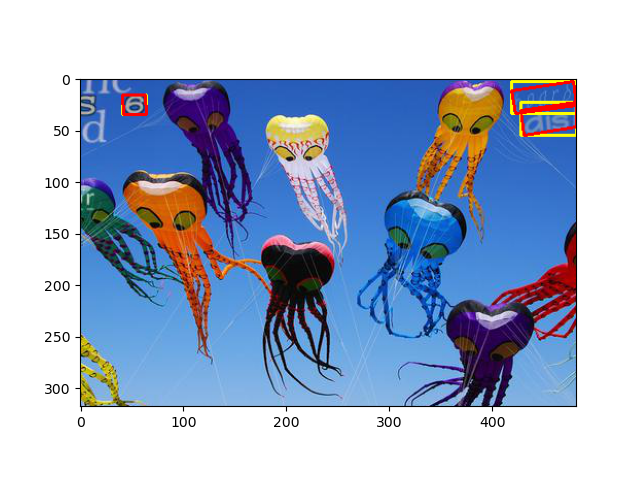

['files']


<IPython.core.display.Javascript object>


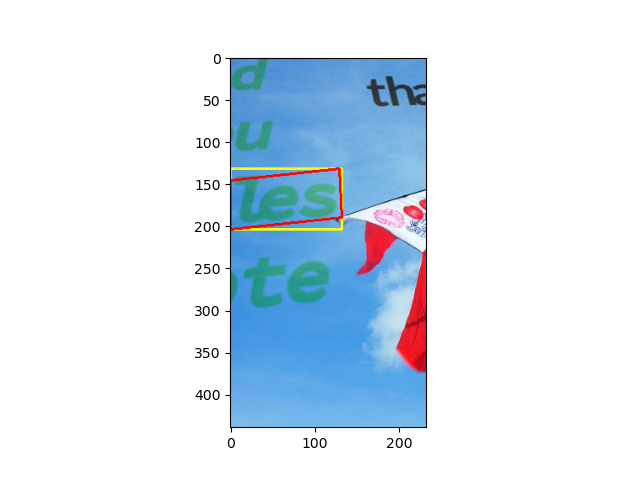

['clock.', 'discovered.']


<IPython.core.display.Javascript object>


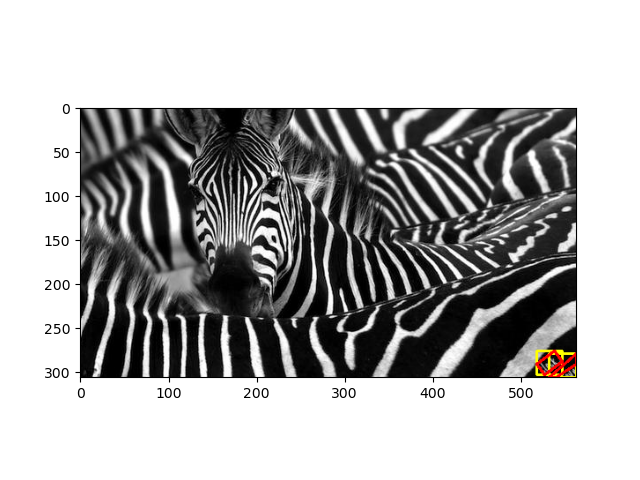

In [3]:
dataset = datasets.SynthTextDataset(ignore=None, transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [2, 3, 4, 15000]
for index in indices:
    img, targets, texts = dataset[index]
    
    locs, quads = targets[:, :4], targets[:, 4:12]

    print(texts)

    img = toVisualizeRectangleRGBimg(img, locs, rgb=(255,255,0), verbose=False)# yellow
    img = toVisualizeQuadsRGBimg(torch.from_numpy(img.transpose((2, 0, 1)) / 255.), quads, verbose=False)# red

    plt.figure()
    plt.imshow(img)